##End-to-end Machine Learning project

##Bike sharing data:Prediction of overall user count

Bike Sharing system provide a low-cost environment-friendly transportation alternatives for the cities. 
hese systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. However, Bike pick-up-demands at different places at different times is unbalanced so the system has to rebalance frequently. This rebalance is a very challenging task. For that, we need to predict the demand for bikes for a given day and time. 








In this  analysis, I try to predict the demand (count of users) of bikes at Washington, D.C. using different machine learning algorithms.


The dataset i used is taken from [link text](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#)

###Setup

In [0]:
# Common imports
import numpy as np
import os

In [0]:
 #To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import model_selection

In [0]:
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

##Get data

In [5]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip

--2019-03-08 05:14:24--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/zip]
Saving to: ‘Bike-Sharing-Dataset.zip.3’

Bike-Sharing-Datase 100%[===================>] 273.43K   921KB/s    in 0.3s    

2019-03-08 05:14:24 (921 KB/s) - ‘Bike-Sharing-Dataset.zip.3’ saved [279992/279992]



In [6]:
!unzip Bike-Sharing-Dataset.zip

Archive:  Bike-Sharing-Dataset.zip
replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace day.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace hour.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [7]:
data = pd.read_csv('hour.csv')
print(data.shape)

(17379, 17)


In [8]:
data.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [9]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


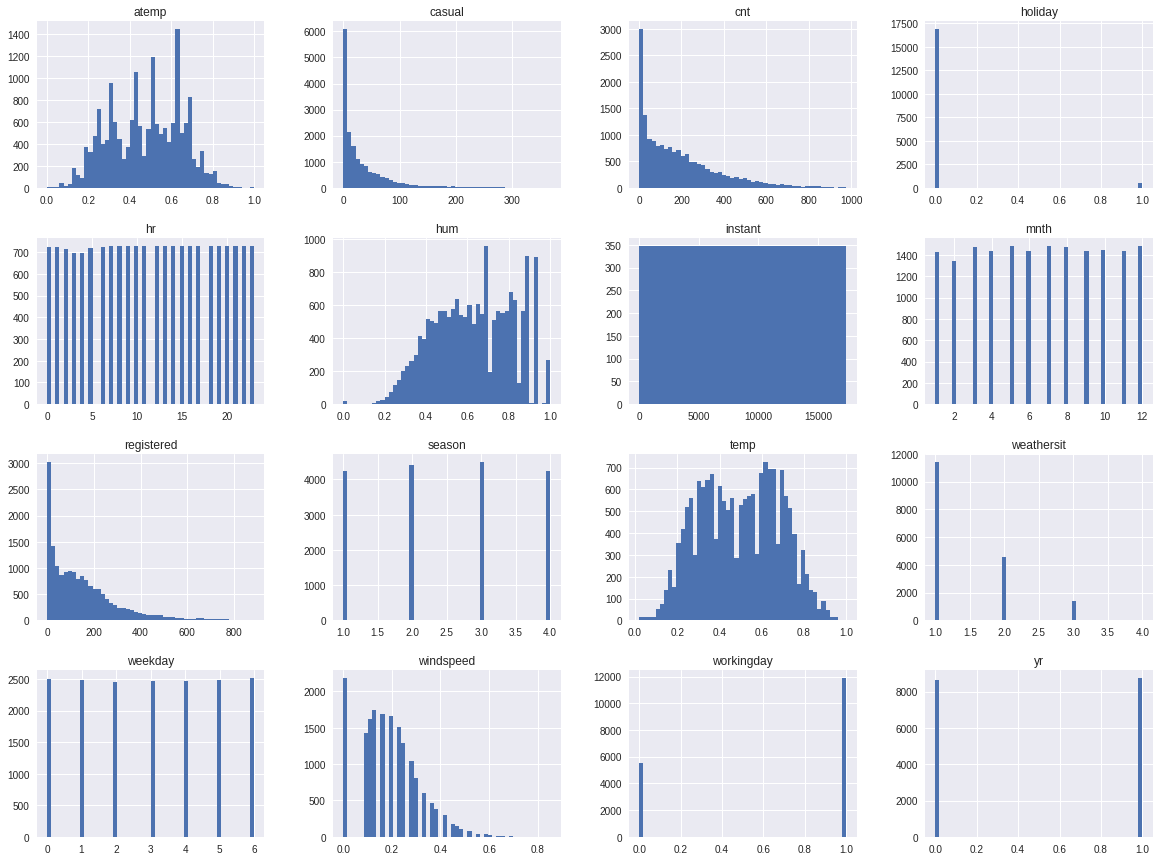

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [0]:
# Renaming the some of the columns in the dataset
data.rename(columns={'weathersit':'weather',
                     'mnth':'month',
                     'hr':'hour',
                     'hum': 'humidity',
                     'cnt':'count'},inplace=True)

data = data.drop(['instant','dteday','yr'], axis=1)

In [14]:
#Converting into categorical variables
data['season'] = data.season.astype('category')
data['month'] = data.month.astype('category')
data['hour'] = data.hour.astype('category')
data['holiday'] = data.holiday.astype('category')
data['weekday'] = data.weekday.astype('category')
data['workingday'] = data.workingday.astype('category')
data['weather'] = data.weather.astype('category')

data.dtypes

season        category
month         category
hour          category
holiday       category
weekday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity       float64
windspeed      float64
casual           int64
registered       int64
count            int64
dtype: object

In [0]:
# to make this notebook's output identical at every run
np.random.seed(42)

##Discover and visualize the data to gain insights

###Plot 1:  Total count vs Hour based on weekdays

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


[Text(0.5, 1.0, 'Use of the system during weekdays and weekends')]

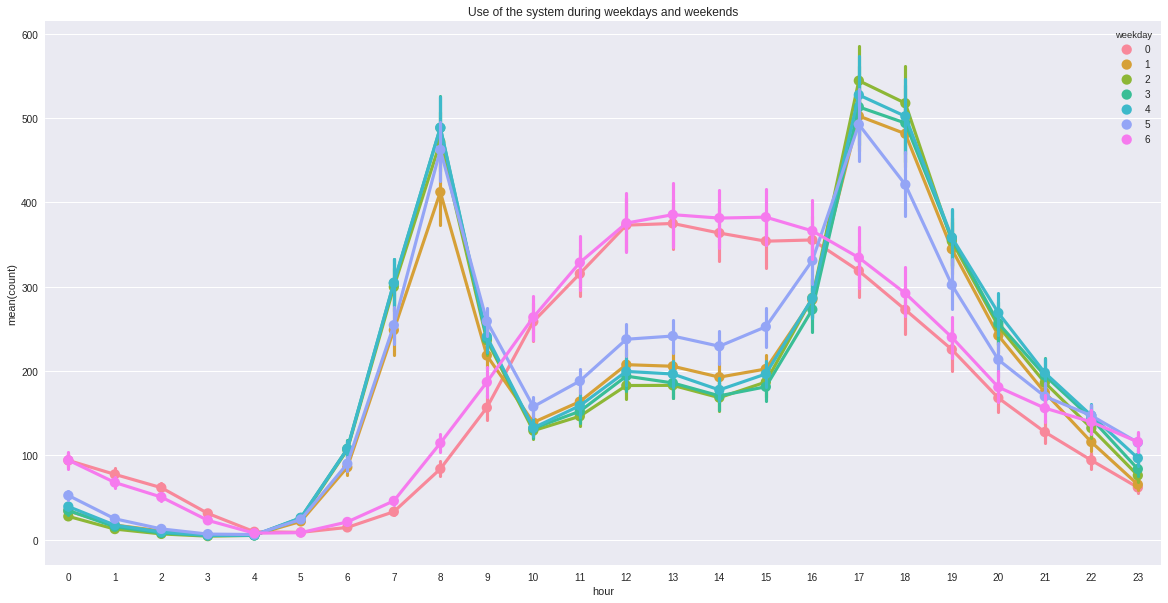

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
sn.pointplot(data=data[['hour',
                       'count',
                       'weekday']],
            x='hour', y='count',
            hue='weekday', ax=ax)
ax.set(title="Use of the system during weekdays and weekends")

From the plot we can see that total count is varying with hour. the time betweeb 7am-9am and eveng 4pm-7pm having high demand of bike. We can also see that all working days monday-friday follows same pattern and saturday and sunday follows the same pattern

###plot 2: Total count vs hour based on weather

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


[Text(0.5, 1.0, 'Use of the system: weather condition')]

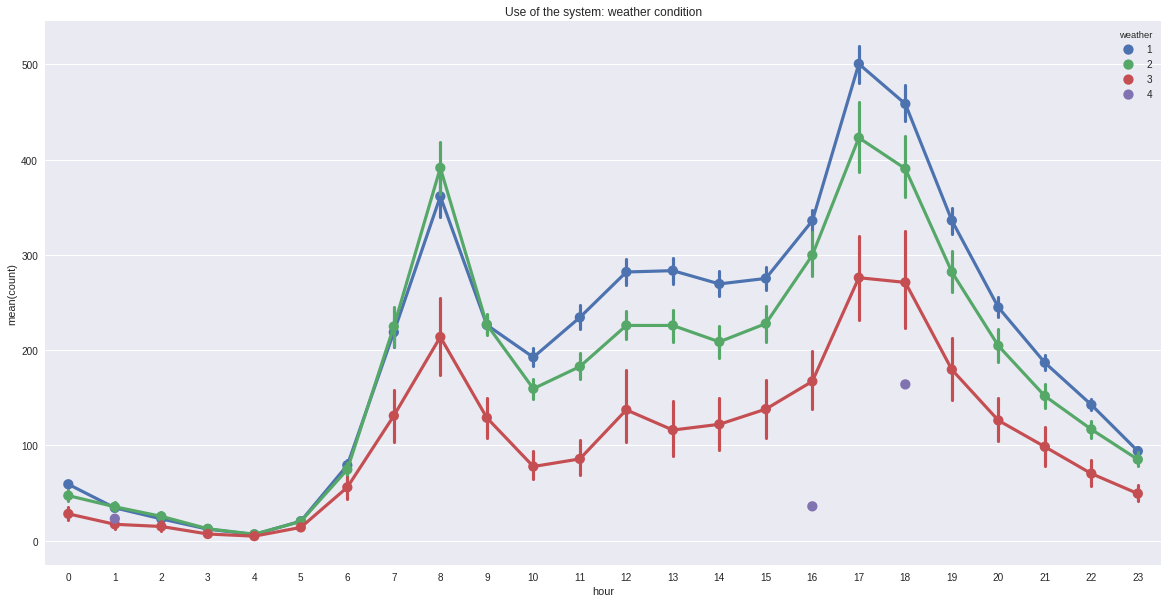

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
sn.pointplot(data=data[['hour',
                       'count',
                       'weather']],
            x='hour', y='count',
            hue='weather', ax=ax)
ax.set(title="Use of the system: weather condition")

1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Clear day has high demand and heavy rain day has low demand

### plot 3: Total count vs hour based on season

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


[Text(0.5, 1.0, 'Use of the system: season')]

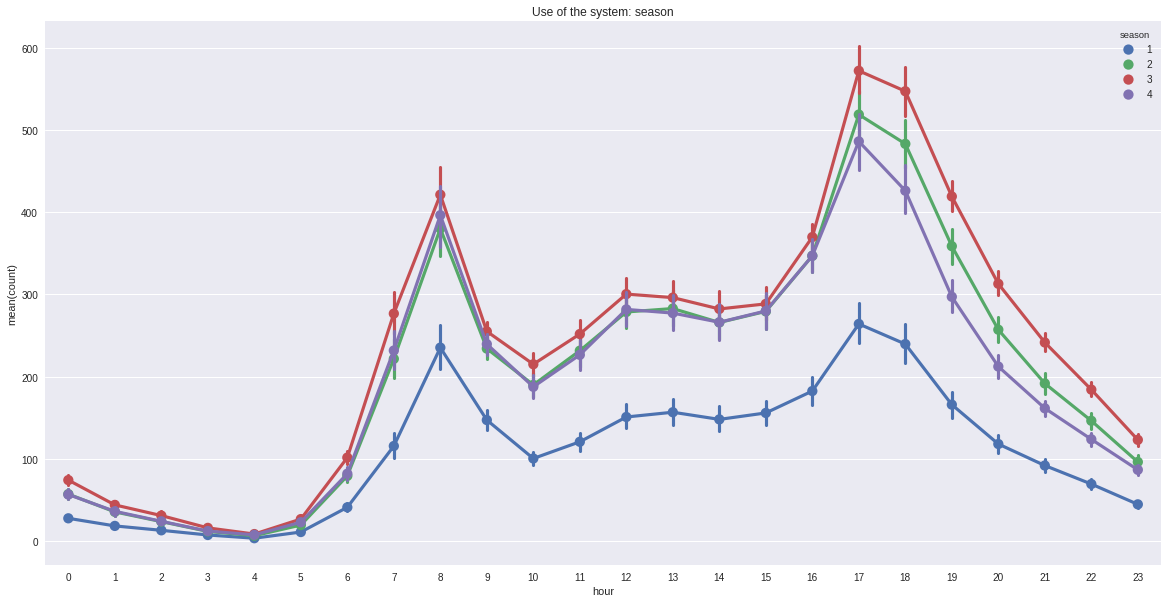

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
sn.pointplot(data=data[['hour',
                       'count',
                       'season']],
            x='hour', y='count',
            hue='season', ax=ax)
ax.set(title="Use of the system: season")

### plot4 : Monthy distribution

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


[Text(0.5, 1.0, 'Monthly distribution')]

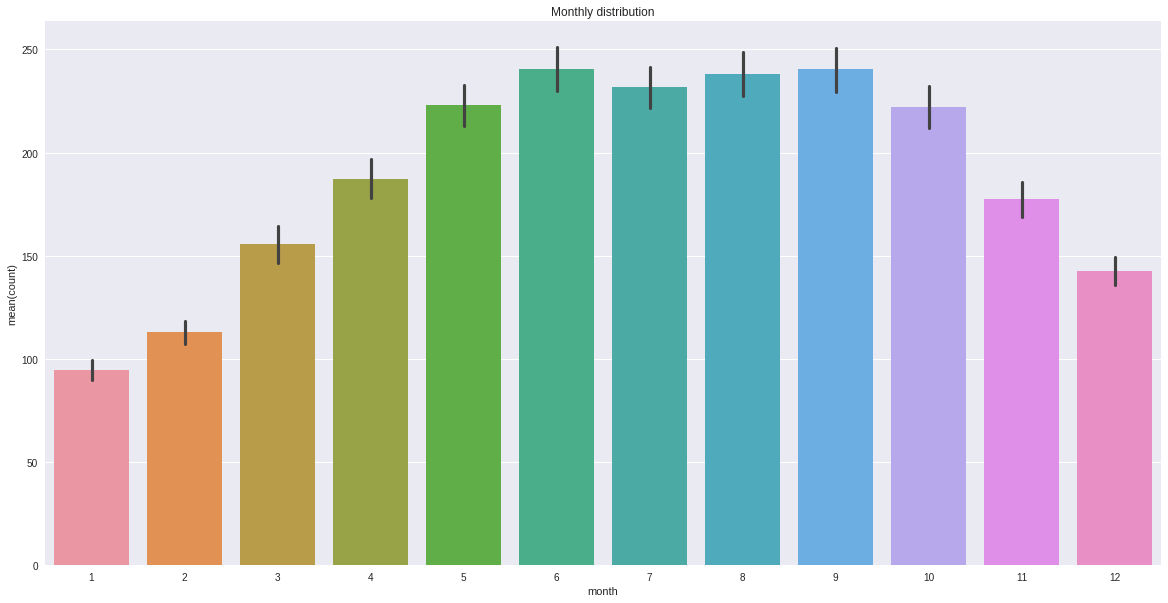

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
sn.barplot(data=data[['month',
                      'count']],
            x='month', y='count')
ax.set(title="Monthly distribution")

From this we can see jan,dec,feb has less demand of bike and june,july aug,sep has high demand of bike

### plot 5: Bar plot of holiday

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


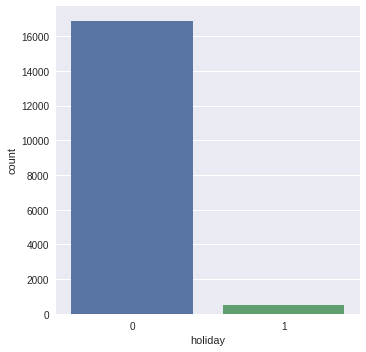

In [20]:
#holiday
data.holiday.value_counts()
sn.factorplot(x='holiday',data=data,kind='count',size=5,aspect=1) # majority of data is for non holiday days.

### Plot6: Bar plot of working day

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


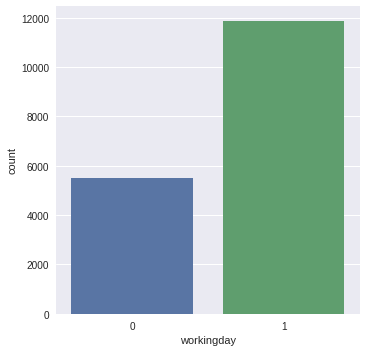

In [21]:
#working day
data.workingday.value_counts()
sn.factorplot(x='workingday',data=data,kind='count',size=5,aspect=1) # majority of data is for working days.

### Plot 7: Bar plot of season





/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


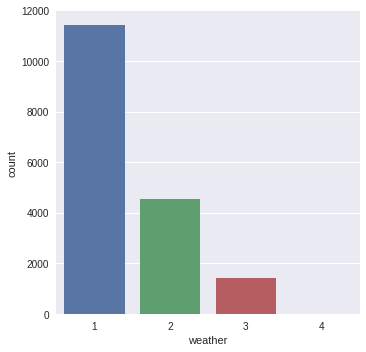

In [22]:
sn.factorplot(x='weather',data=data,kind='count',size=5,aspect=1)  
# 1-> spring
# 2-> summer
# 3-> fall
# 4-> winter

### Correlation matrix

It’s also a good idea to look for data correlation to see how variables are interconnected. Remember that if we decide to use linear regression as our prediction model, we can’t have multicollinearity and data distribution must be normal. As a recall, regression analysis assumptions are:

Samples must represent population being modeled.
Independent variables are linearly independent.
Variance of error is consistent across the sample

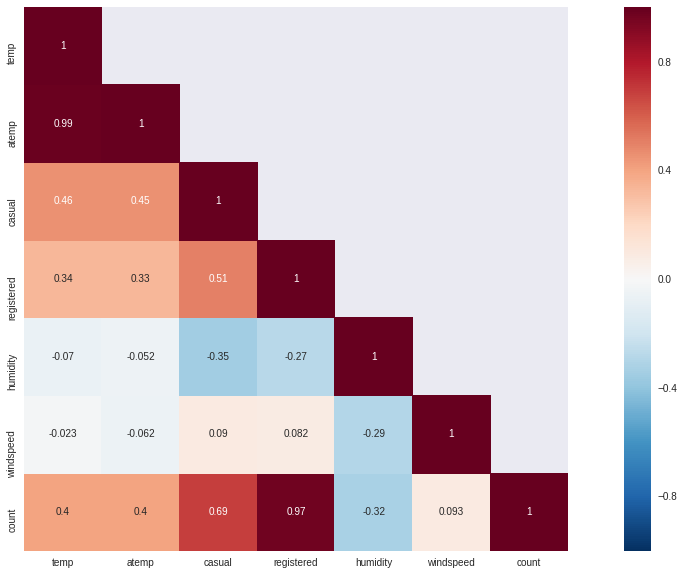

In [23]:
data_correlation = data[['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'count']].corr()
mask = np.array(data_correlation)
mask[np.tril_indices_from(mask)] = False
fig = plt.subplots(figsize=(20,10))
sn.heatmap(data_correlation, mask=mask, vmax=1, square=True, annot=True)

From this correalation matrix we can see that  temp and atemp variables are highly correlated. so we can remove atemp already.

Another observation we can see that registered count is correlated with count and casual count also correlated with count. So we can remove the registerd count and casual count.

Also, since the count is a decomposition of these two variables, we could have problems if they remain on the data set. So, let’s get rid of them too.

Notice that windspeed correlation with count is so low that we won’t even consider it in our model. We can remove it too.

In [0]:
data = data.drop(['atemp', 'casual', 'registered', 'windspeed'], axis=1)

### plot 8: scatter plot of count vs temperature and count vs Humidity

[Text(0.5, 1.0, 'Relation between humidity and total users')]

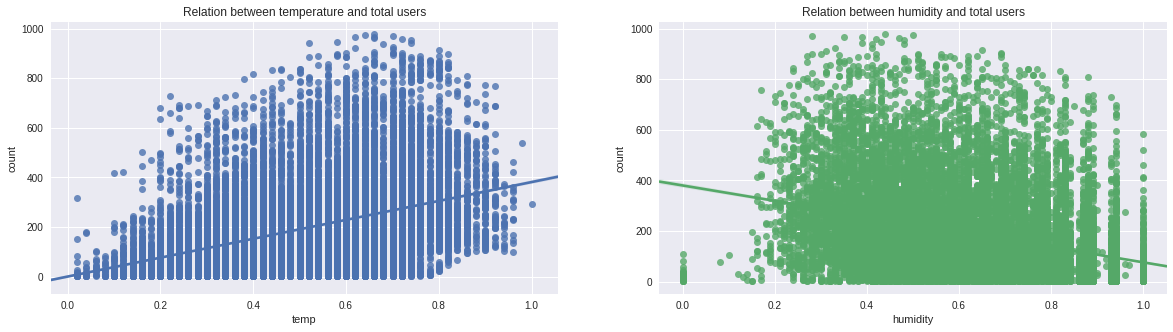

In [25]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sn.regplot(x=data['temp'], y=data['count'], ax=ax1)
ax1.set(title="Relation between temperature and total users")
sn.regplot(x=data['humidity'], y=data['count'], ax=ax2)
ax2.set(title="Relation between humidity and total users")

We can see a postive correlation between count and temp and negative correlation between count and humidity

### plot 9 box plot of categorical variables

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


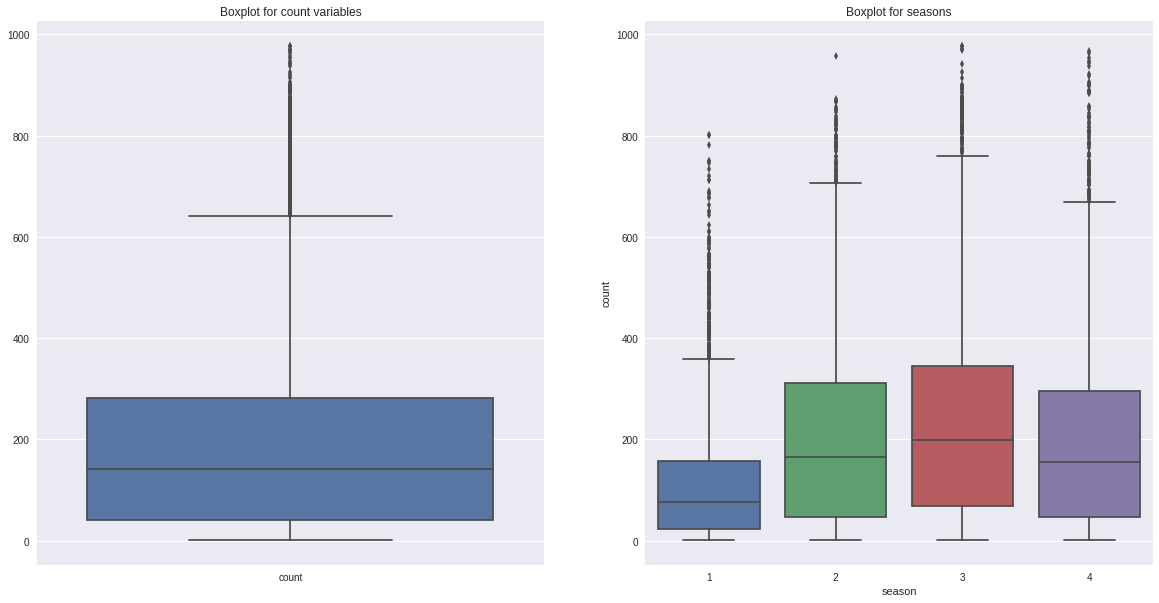

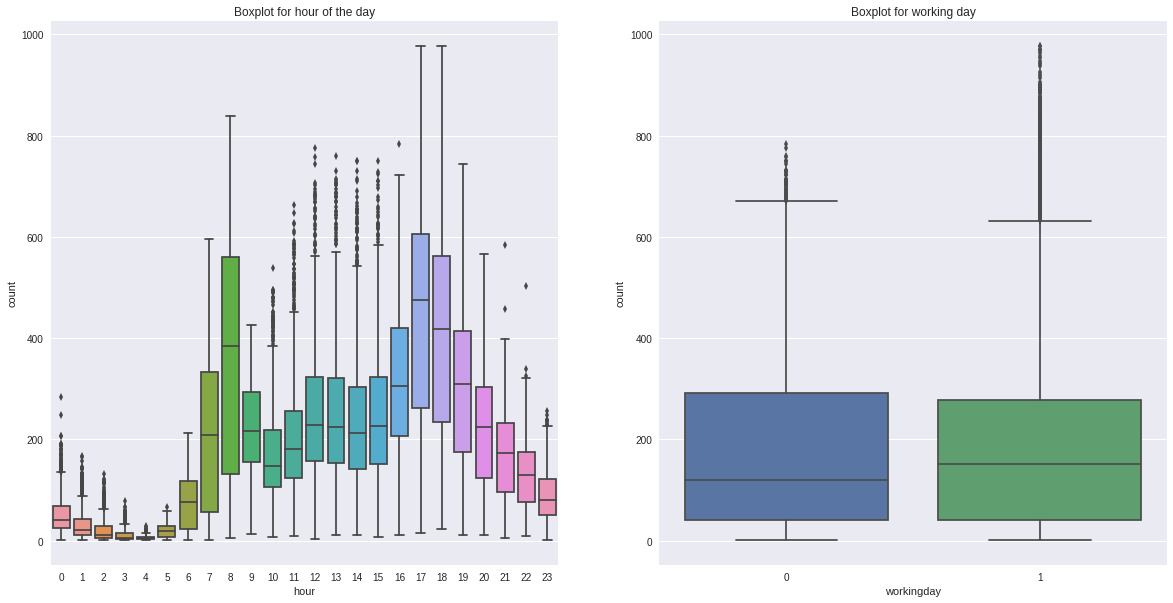

In [26]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,10))
sn.boxplot(data=data[['count']], ax=ax1)
ax1.set(title="Boxplot for count variables")
sn.boxplot(x=data['season'],y=data['count'], ax=ax2)
ax2.set(title="Boxplot for seasons")

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,10))
ax1.set(title="Boxplot for hour of the day")
sn.boxplot(x=data['hour'],y=data['count'], ax=ax1)
ax2.set(title="Boxplot for working day")
sn.boxplot(x=data['workingday'],y=data['count'], ax=ax2)

Do you remember about the importance of a normal distribution? If you plot the count variable, you will see that it’s not normal. Let’s apply a log transformation to it so we can have something closer to a normal distribution.

##Prepare the data for Machine Learning algorithms

Checking the presense of null values

In [27]:
data.isnull().sum()

season        0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
humidity      0
count         0
dtype: int64

Since the dataset is not contain any null value we dont need to do the data cleaning process.

Since we are using regresion analysis as a machine learning algoritham we need to check weather the variables follows normal destribution so  for that we can check that by plotting a normal distribution curve and quantitle-quantile plot.

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


[Text(0.5, 1.0, 'Theoretical quantiles')]

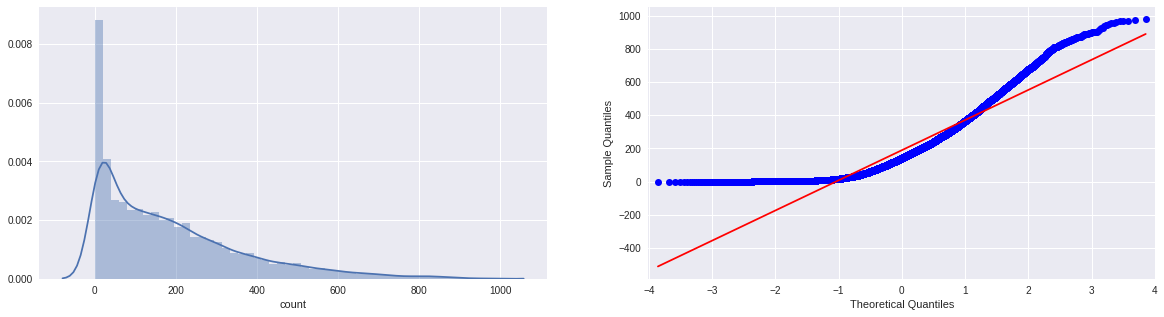

In [28]:
from statsmodels.graphics.gofplots import qqplot

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sn.distplot(data['count'], ax=ax1)
ax.set(title="Distribution after log of count")
qqplot(data['count'], line='s', ax=ax2)
ax.set(title="Theoretical quantiles")

From the plot we can see that there is a vialation of normality assumption so we need to transform the predictor variable. So here we adopt log transformation.

In [0]:
import math
data['count'] = data['count'].transform(lambda x: math.log(x))

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


[Text(0.5, 1.0, 'Theoretical quantiles')]

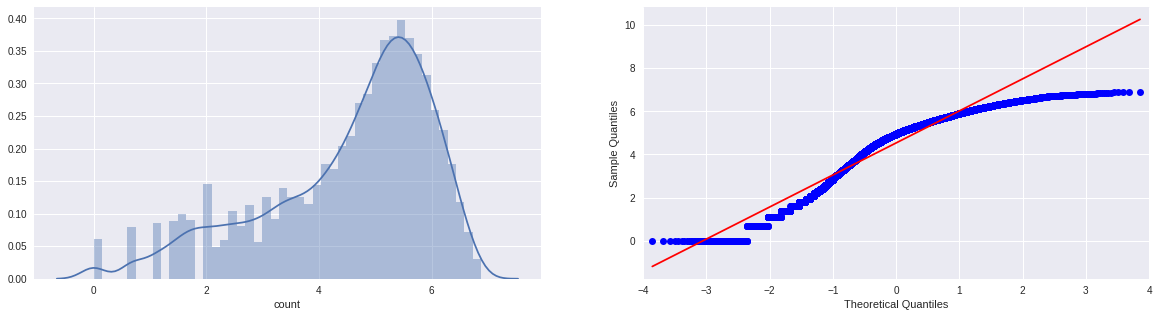

In [55]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sn.distplot(data['count'], ax=ax1)
ax.set(title="Distribution after log of count")
qqplot(data['count'], line='s', ax=ax2)
ax.set(title="Theoretical quantiles")

#### one hot encoding

In [30]:
data_dummy = data

def dummify_dataset(df, column):       
    df = pd.concat([df, pd.get_dummies(df[column], prefix=column, drop_first=True)],axis=1)
    df = df.drop([column], axis=1)
    return df

columns_to_dummify = ['season', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather']
for column in columns_to_dummify:
    data_dummy = dummify_dataset(data_dummy, column)
    
data_dummy.head().T

,0,1,2,3,4
temp,0.240000,0.220000,0.220000,0.240000,0.24
humidity,0.810000,0.800000,0.800000,0.750000,0.75
count,2.772589,3.688879,3.465736,2.564949,0.00
season_2,0.000000,0.000000,0.000000,0.000000,0.00
season_3,0.000000,0.000000,0.000000,0.000000,0.00
season_4,0.000000,0.000000,0.000000,0.000000,0.00
month_2,0.000000,0.000000,0.000000,0.000000,0.00
month_3,0.000000,0.000000,0.000000,0.000000,0.00
month_4,0.000000,0.000000,0.000000,0.000000,0.00
month_5,0.000000,0.000000,0.000000,0.000000,0.00


#### Creation of test and train data by random split

In [0]:
from sklearn.model_selection import train_test_split

y = data_dummy['count']
X = data_dummy.drop(['count'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.33,
                                                   random_state=42)

##Select and train a model

### linear regression model

In [32]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

models = [LinearRegression(),
          RandomForestRegressor(),
          ]

def test_algorithms(model):
    kfold = model_selection.KFold(n_splits=10, random_state=0)
    predicted = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(predicted.mean())
    
for model in models:
    test_algorithms(model)

-0.4440551682534338


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

-0.2695185140666786


In [34]:
from sklearn.metrics import mean_squared_error
data_predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.6730753729041421

In [35]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_train, data_predictions)
lin_mae

0.5109916663018576

### Decision Tree

In [36]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train )

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [37]:
data_predictions=tree_reg.predict(X_train)
tree_mse=mean_squared_error(y_train,data_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.03193220733575582

##Fine-tune your model

In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [39]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.6555844  0.66913687 0.63868592 0.67671023 0.66859824 0.69916058
 0.70891783 0.68390517 0.70069003 0.65447624]
Mean: 0.675586551213078
Standard deviation: 0.021599024138864966


In [40]:
lin_scores = cross_val_score(lin_reg, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.67731286 0.66925711 0.66349088 0.65311878 0.66997079 0.65845492
 0.66355982 0.68130976 0.65960855 0.66716401]
Mean: 0.6663247467928277
Standard deviation: 0.008154757194910793


### Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [42]:
data_predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, data_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.22000518759122104

### Support vector Regressor

In [43]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)
data_predictions = svm_reg.predict(X_train)
svm_mse = mean_squared_error(y_train, data_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.6799639898599003

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

Best parameter

In [45]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

Best estimator

In [46]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [0]:
cvres = grid_search.cv_results_

In [48]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
...     print(np.sqrt(-mean_score), params)
...

0.7722017101000122 {'max_features': 2, 'n_estimators': 3}
0.6477634119474998 {'max_features': 2, 'n_estimators': 10}
0.5994419746769547 {'max_features': 2, 'n_estimators': 30}
0.6953942833907254 {'max_features': 4, 'n_estimators': 3}
0.5950002701766541 {'max_features': 4, 'n_estimators': 10}
0.5525948188221468 {'max_features': 4, 'n_estimators': 30}
0.6597998524875104 {'max_features': 6, 'n_estimators': 3}
0.5599822299910194 {'max_features': 6, 'n_estimators': 10}
0.534174786947013 {'max_features': 6, 'n_estimators': 30}
0.6514512988508857 {'max_features': 8, 'n_estimators': 3}
0.5631936669677983 {'max_features': 8, 'n_estimators': 10}
0.5286079652052119 {'max_features': 8, 'n_estimators': 30}
0.7582436799880962 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.6167279135446752 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.7133107567314908 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.5972189284906014 {'bootstrap': False, 'max_features': 3, 'n_

In [49]:
feature_importances=grid_search.best_estimator_.feature_importances_
feature_importances

array([1.28120198e-01, 9.62849493e-02, 4.62780925e-03, 8.12483867e-03,
       9.99234396e-03, 5.74960832e-03, 4.77427509e-03, 2.88999175e-03,
       2.43240447e-03, 2.42031688e-03, 1.85913116e-03, 1.87345669e-03,
       2.63604600e-03, 2.48694163e-03, 3.38676054e-03, 4.08012879e-03,
       4.55765555e-02, 8.35900499e-02, 1.09097580e-01, 1.52704231e-01,
       6.29260968e-02, 1.33763282e-02, 1.01707768e-02, 2.11715420e-02,
       8.95707252e-03, 3.72254115e-03, 3.48389647e-03, 5.05442089e-03,
       4.25817700e-03, 2.59247565e-03, 2.76358898e-03, 9.76130344e-03,
       2.21701990e-02, 1.73239277e-02, 1.11361290e-02, 5.18979623e-03,
       3.56238729e-03, 3.50027021e-03, 7.25132407e-03, 2.85002573e-03,
       6.74601121e-03, 6.70099129e-03, 6.36557099e-03, 6.28806634e-03,
       5.53149267e-03, 1.07036747e-02, 4.63995300e-02, 7.83956061e-03,
       9.46717709e-03, 2.80287694e-05])

Final root mean square error

In [50]:
final_model=grid_search.best_estimator_
final_predictions=final_model.predict(X_test)
final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
final_rmse

0.5255960841452191

We can compute a 95% confidence interval for the test RMSE:

In [0]:
from scipy import stats

In [52]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([0.51065252, 0.54012637])

In [53]:
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(0.5106525158050127, 0.5401263698798521)

In [54]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(0.5106557157514183, 0.5401233445315822)